In [1]:
import pandas as pd

#### 1. top_10 버스: 버스노선도 시각화
-(1): 전처리 작업

In [2]:
top_ten = pd.read_csv('./십걸.csv')
top_ten.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
top_ten['사용년월'] = pd.to_datetime(top_ten['사용년월'], format='%Y%m')

In [4]:
top_ten['year'] = top_ten['사용년월'].dt.year
top_ten['month'] = top_ten['사용년월'].dt.month

In [5]:
top_ten['year'] = top_ten['year'].astype('str').str[:-2]
top_ten['month'] = top_ten['month'].astype('str').str[:-2]

In [6]:
top_ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28053 entries, 0 to 28052
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   사용년월         25701 non-null  datetime64[ns]
 1   노선번호         28053 non-null  int64         
 2   노선명          28053 non-null  object        
 3   표준버스정류장ID    28053 non-null  int64         
 4   버스정류장ARS번호   28053 non-null  int64         
 5   역명           28053 non-null  object        
 6   17시승차총승객수    28053 non-null  int64         
 7   17시하차총승객수    28053 non-null  int64         
 8   18시승차총승객수    28053 non-null  int64         
 9   18시하차총승객수    28053 non-null  int64         
 10  19시승차총승객수    28053 non-null  int64         
 11  19시하차총승객수    28053 non-null  int64         
 12  20시승차총승객수    28053 non-null  int64         
 13  20시하차총승객수    28053 non-null  int64         
 14  등록일자         28053 non-null  int64         
 15  자치구          28053 non-null  object        
 16  퇴근시간

In [7]:
top_ten.head(2)

,사용년월,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,등록일자,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수,year,month
0,2020-01-01,130,130번(우이동~길동),103000001,4001,답십리역사거리,534,1059,766,1115,844,983,494,649,20200203,성동구,2638,3806,2020,1
1,2020-01-01,130,130번(우이동~길동),103000002,4002,청년회의소.서울새활용플라자,420,704,728,756,602,569,288,392,20200203,성동구,2038,2421,2020,1


In [8]:
top_ten.columns

Index(['사용년월', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역명', '17시승차총승객수',
       '17시하차총승객수', '18시승차총승객수', '18시하차총승객수', '19시승차총승객수', '19시하차총승객수',
       '20시승차총승객수', '20시하차총승객수', '등록일자', '자치구', '퇴근시간대승차총승객수', '퇴근시간대하차총승객수',
       'year', 'month'],
      dtype='object')

In [9]:
# import numpy as np
# top_ten['노선명'] = pd.Series(np.array(top_ten['노선명'].str.extract(r'(\d*)')).ravel())
drop_cols = ['사용년월', '노선명', '버스정류장ARS번호', '등록일자']
top_ten.drop(drop_cols, axis=1, inplace=True)

In [10]:
top_ten.rename(columns={
    '표준버스정류장ID': '정류소ID'
}, inplace=True)

In [11]:
# 버스정류장ID에 따른 위경도 좌표
data = pd.read_csv('./서울시버스정류소좌표데이터(20220329).csv', encoding='cp949')
data.head(2)

,정류소ID,ARS-ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987750,37.569765
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183


In [12]:
data.drop('ARS-ID', axis=1, inplace=True)
data.rename(columns={
    'X좌표': 'longitude',
    'Y좌표': 'latitude'
}, inplace=True)

In [13]:
print(top_ten.shape, data.shape)

(28053, 16) (11703, 4)


In [14]:
bus = pd.merge(top_ten, data, on='정류소ID', how='inner')

In [15]:
bus.head(2)

,노선번호,정류소ID,역명,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수,year,month,정류소명,longitude,latitude
0,130,103000001,답십리역사거리,534,1059,766,1115,844,983,494,649,성동구,2638,3806,2020,1,답십리역사거리,127.054396,37.56545
1,130,103000001,답십리역사거리,600,1001,899,1110,733,904,439,604,성동구,2671,3619,2020,2,답십리역사거리,127.054396,37.56545


In [16]:
# 역명
bus.drop('역명', axis=1, inplace=True)

In [17]:
# 2022년 12월 데이터만 추출 (가장 최신 데이터)
cond_12 = ((bus['year'] == '2022') & (bus['month'] == '12'))
bus_2022_12 = bus[cond_12].copy()


#### Top10 bus 전처리
- 143, 130, 140, 150, 152, 160, 272, 340, 360, 370

In [18]:
b_143 = bus_2022_12[bus_2022_12['노선번호'] == 143]
b_130 = bus_2022_12[bus_2022_12['노선번호'] == 130]
b_140 = bus_2022_12[bus_2022_12['노선번호'] == 140]
b_150 = bus_2022_12[bus_2022_12['노선번호'] == 150]
b_152 = bus_2022_12[bus_2022_12['노선번호'] == 152]
b_160 = bus_2022_12[bus_2022_12['노선번호'] == 160]
b_272 = bus_2022_12[bus_2022_12['노선번호'] == 272]
b_340 = bus_2022_12[bus_2022_12['노선번호'] == 340]
b_360 = bus_2022_12[bus_2022_12['노선번호'] == 360]
b_370 = bus_2022_12[bus_2022_12['노선번호'] == 370]


In [19]:
b_130.head(1)

,노선번호,정류소ID,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수,year,month,정류소명,longitude,latitude
232,130,104000001,837,580,743,564,628,425,568,288,광진구,2776,1857,2022,12,군자교입구,127.075646,37.558741


In [20]:
b_143 = b_143.drop_duplicates(subset='정류소명')
b_130 = b_130.drop_duplicates(subset='정류소명')
b_140 = b_140.drop_duplicates(subset='정류소명')
b_150 = b_150.drop_duplicates(subset='정류소명')
b_152 = b_152.drop_duplicates(subset='정류소명')
b_160 = b_160.drop_duplicates(subset='정류소명')
b_272 = b_272.drop_duplicates(subset='정류소명')
b_340 = b_340.drop_duplicates(subset='정류소명')
b_360 = b_360.drop_duplicates(subset='정류소명')
b_370 = b_370.drop_duplicates(subset='정류소명')

#### 버스 노선의 재차인원 -> 버스 혼잡도 파악

In [21]:
t_143 = pd.read_csv('./재차인원/143번 재차인원.csv', encoding='cp949')
t_130 = pd.read_csv('./재차인원/130번 재차인원.csv', encoding='cp949')
t_140 = pd.read_csv('./재차인원/140번 재차인원.csv', encoding='cp949')
t_150 = pd.read_csv('./재차인원/150번 재차인원.csv', encoding='cp949')
t_152 = pd.read_csv('./재차인원/152번 재차인원.csv', encoding='cp949')
t_160 = pd.read_csv('./재차인원/160번 재차인원.csv', encoding='cp949')
t_272 = pd.read_csv('./재차인원/272번 재차인원.csv', encoding='cp949')
t_340 = pd.read_csv('./재차인원/340번 재차인원.csv', encoding='cp949')
t_360 = pd.read_csv('./재차인원/360번 재차인원.csv', encoding='cp949')
t_370 = pd.read_csv('./재차인원/370번 재차인원.csv', encoding='cp949')

In [22]:
t_143.columns

Index(['노선', '기종점', '정류장순번', '정류장명', '04시', '05시', '06시', '07시', '08시', '09시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시',
       '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시', 'Unnamed: 28'],
      dtype='object')

In [23]:
t_130.columns

Index(['노선', '기종점', '정류장순번', '정류장명', '04시', '05시', '06시', '07시', '08시', '09시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시',
       '20시', '21시', '22시', '23시', '00시', '01시', '02시', '03시', 'Unnamed: 28'],
      dtype='object')

In [24]:
drop_cols = ['노선', '기종점', '04시', '05시', '06시','07시', '08시', '09시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
             '21시', '22시', '23시', '00시', '01시', '02시', '03시', 'Unnamed: 28']
t_143.drop(drop_cols, axis=1, inplace=True)
t_130.drop(drop_cols, axis=1, inplace=True)
t_140.drop(drop_cols, axis=1, inplace=True)
t_150.drop(drop_cols, axis=1, inplace=True)
t_152.drop(drop_cols, axis=1, inplace=True)
t_160.drop(drop_cols, axis=1, inplace=True)
t_272.drop(drop_cols, axis=1, inplace=True)
t_340.drop(drop_cols, axis=1, inplace=True)
t_360.drop(drop_cols, axis=1, inplace=True)
t_370.drop(drop_cols, axis=1, inplace=True)

In [25]:
t_130.head(1)

,정류장순번,정류장명,17시,18시,19시,20시
0,1,우이동차고지(기점가상),5,8,7,4


In [26]:
t_143 = t_143.drop_duplicates(subset='정류장명')
t_130 = t_130.drop_duplicates(subset='정류장명')
t_140 = t_140.drop_duplicates(subset='정류장명')
t_150 = t_150.drop_duplicates(subset='정류장명')
t_152 = t_152.drop_duplicates(subset='정류장명')
t_160 = t_160.drop_duplicates(subset='정류장명')
t_272 = t_272.drop_duplicates(subset='정류장명')
t_340 = t_340.drop_duplicates(subset='정류장명')
t_360 = t_360.drop_duplicates(subset='정류장명')
t_370 = t_370.drop_duplicates(subset='정류장명')

In [27]:
t_143.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_130.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_140.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_150.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_152.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_160.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_272.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_340.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_360.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

t_370.rename(columns={
    '정류장명' : '정류소명'
}, inplace=True)

In [28]:
bus_143 = pd.merge(b_143, t_143,on='정류소명', how='inner')
bus_130 = pd.merge(b_130, t_130,on='정류소명', how='inner')
bus_140 = pd.merge(b_140, t_140,on='정류소명', how='inner')
bus_150 = pd.merge(b_150, t_150,on='정류소명', how='inner')
bus_152 = pd.merge(b_152, t_152,on='정류소명', how='inner')
bus_160 = pd.merge(b_160, t_160,on='정류소명', how='inner')
bus_272 = pd.merge(b_272, t_272,on='정류소명', how='inner')
bus_340 = pd.merge(b_340, t_340,on='정류소명', how='inner')
bus_360 = pd.merge(b_360, t_360,on='정류소명', how='inner')
bus_370 = pd.merge(b_143, t_370,on='정류소명', how='inner')

In [29]:
bus_130.head(1)

,노선번호,정류소ID,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,...,year,month,정류소명,longitude,latitude,정류장순번,17시,18시,19시,20시
0,130,104000001,837,580,743,564,628,425,568,288,...,2022,12,군자교입구,127.075646,37.558741,35,43,52,32,13


In [30]:
bus_143 = bus_143.sort_values(by='정류장순번')
bus_130 = bus_130.sort_values(by='정류장순번')
bus_140 = bus_140.sort_values(by='정류장순번')
bus_150 = bus_150.sort_values(by='정류장순번')
bus_152 = bus_152.sort_values(by='정류장순번')
bus_160 = bus_160.sort_values(by='정류장순번')
bus_272 = bus_272.sort_values(by='정류장순번')
bus_340 = bus_340.sort_values(by='정류장순번')
bus_360 = bus_360.sort_values(by='정류장순번')
bus_370 = bus_370.sort_values(by='정류장순번')

#### 버스 재차 인원 
- 재차인원이 20명 이하는 '여유', 21-35는 '보통', 36-50은 '혼잡', 51 이상은 '매우혼잡'

In [31]:
def solve(col):
    lst = []
    for row in t_143.iterrows():
        if row[1][col] <= 20:
            lst.append('여유')
        elif row[1][col] > 20 and row[1][col] <= 35:
            lst.append('보통')
        elif row[1][col] > 35 and row[1][col] <= 50:
            lst.append('혼잡')
        else:
            lst.append('매우혼잡')
    return pd.Series(lst)

In [32]:
# 함수를 통해 모두 매핑
#### 143번 버스 ######
t_143['17시 혼잡도'] = solve('17시')
t_143['18시_혼잡도'] = solve('18시')
t_143['19시_혼잡도'] = solve('19시')
t_143['20시_혼잡도'] = solve('20시')

#### 130번 버스 ######
t_130['17시 혼잡도'] = solve('17시')
t_130['18시_혼잡도'] = solve('18시')
t_130['19시_혼잡도'] = solve('19시')
t_130['20시_혼잡도'] = solve('20시')

#### 140번 버스 ######
t_140['17시 혼잡도'] = solve('17시')
t_140['18시_혼잡도'] = solve('18시')
t_140['19시_혼잡도'] = solve('19시')
t_140['20시_혼잡도'] = solve('20시')

#### 150번 버스 ######
t_150['17시 혼잡도'] = solve('17시')
t_150['18시_혼잡도'] = solve('18시')
t_150['19시_혼잡도'] = solve('19시')
t_150['20시_혼잡도'] = solve('20시')

#### 152번 버스 ######
t_152['17시 혼잡도'] = solve('17시')
t_152['18시_혼잡도'] = solve('18시')
t_152['19시_혼잡도'] = solve('19시')
t_152['20시_혼잡도'] = solve('20시')

#### 160번 버스 ######
t_160['17시 혼잡도'] = solve('17시')
t_160['18시_혼잡도'] = solve('18시')
t_160['19시_혼잡도'] = solve('19시')
t_160['20시_혼잡도'] = solve('20시')

#### 272번 버스 ######
t_272['17시 혼잡도'] = solve('17시')
t_272['18시_혼잡도'] = solve('18시')
t_272['19시_혼잡도'] = solve('19시')
t_272['20시_혼잡도'] = solve('20시')

#### 340번 버스 ######
t_340['17시 혼잡도'] = solve('17시')
t_340['18시_혼잡도'] = solve('18시')
t_340['19시_혼잡도'] = solve('19시')
t_340['20시_혼잡도'] = solve('20시')

#### 360번 버스 ######
t_360['17시 혼잡도'] = solve('17시')
t_360['18시_혼잡도'] = solve('18시')
t_360['19시_혼잡도'] = solve('19시')
t_360['20시_혼잡도'] = solve('20시')

#### 370번 버스 ######
t_370['17시 혼잡도'] = solve('17시')
t_370['18시_혼잡도'] = solve('18시')
t_370['19시_혼잡도'] = solve('19시')
t_370['20시_혼잡도'] = solve('20시')

In [33]:
t_143.head(3)

,정류장순번,정류소명,17시,18시,19시,20시,17시 혼잡도,18시_혼잡도,19시_혼잡도,20시_혼잡도
0,1,대진여객차고지(가상),3,6,2,3,여유,여유,여유,여유
1,2,정릉산장아파트,11,9,4,5,여유,여유,여유,여유
2,3,정릉4동주민센터.경국사,10,9,3,3,여유,여유,여유,여유


In [111]:
# 시각화를 위해 혼잡도가 매핑된 데이터프레임 따로 저장
t_143.to_csv('./혼잡도 시각화/혼잡도143.csv', index=False)
t_130.to_csv('./혼잡도 시각화/혼잡도130.csv', index=False)
t_140.to_csv('./혼잡도 시각화/혼잡도140.csv', index=False)
t_150.to_csv('./혼잡도 시각화/혼잡도150.csv', index=False)
t_152.to_csv('./혼잡도 시각화/혼잡도152.csv', index=False)
t_160.to_csv('./혼잡도 시각화/혼잡도160.csv', index=False)
t_272.to_csv('./혼잡도 시각화/혼잡도272.csv', index=False)
t_340.to_csv('./혼잡도 시각화/혼잡도340.csv', index=False)
t_360.to_csv('./혼잡도 시각화/혼잡도360.csv', index=False)
t_370.to_csv('./혼잡도 시각화/혼잡도370.csv', index=False)

In [105]:
def mapping(col):
    # 1. 17시 혼잡도
    cond1 = ((col['17시 혼잡도'] == '혼잡') | (col['17시 혼잡도'] == '매우혼잡'))
    # 2. 18시 혼잡도
    cond2 = ((col['18시_혼잡도'] == '혼잡') | (col['18시_혼잡도'] == '매우혼잡'))
    # 3. 19시 혼잡도
    cond3 = ((col['19시_혼잡도'] == '혼잡') | (col['19시_혼잡도'] == '매우혼잡'))
    # 4. 20시 혼잡도
    cond4 = ((col['20시_혼잡도'] == '혼잡') | (col['20시_혼잡도'] == '매우혼잡'))
    
    return [col[cond1], col[cond2], col[cond3], col[cond4]]

In [80]:
# 각 시간대 별로, 혼잡인 정류장 순번과 정류소명 시각화 해보자.
# 1. 17시_혼잡도
cond1 = ((t_143['17시_혼잡도'] == '혼잡') | (t_143['17시_혼잡도'] == '매우혼잡'))
# 2. 18시 혼잡도
cond2 = ((t_143['18시_혼잡도'] == '혼잡') | (t_143['18시_혼잡도'] == '매우혼잡'))
# 3. 19시 혼잡도
cond3 = ((t_143['19시_혼잡도'] == '혼잡') | (t_143['19시_혼잡도'] == '매우혼잡'))
# 4. 20시 혼잡도
cond4 = ((t_143['20시_혼잡도'] == '혼잡') | (t_143['20시_혼잡도'] == '매우혼잡'))
t_143[cond1]

,index,정류장순번,정류소명,17시,18시,19시,20시,17시_혼잡도,18시_혼잡도,19시_혼잡도,20시_혼잡도
19,19,20,롯데백화점,41,45,42,36,혼잡,혼잡,혼잡,혼잡
20,20,21,신세계앞,49,53,37,45,혼잡,매우혼잡,혼잡,혼잡
21,21,22,남산3호터널,40,53,48,46,혼잡,매우혼잡,혼잡,혼잡
25,25,26,한강중학교앞,37,48,29,28,혼잡,혼잡,보통,보통
60,61,62,대치현대아파트,36,44,26,7,혼잡,혼잡,보통,여유
67,83,84,한강중학교,40,40,44,22,혼잡,혼잡,혼잡,보통
68,85,86,국군재정관리단,37,39,35,19,혼잡,혼잡,보통,여유
69,86,87,이태원동남산대림아파트.용산동아파트,36,45,30,20,혼잡,혼잡,보통,여유
81,103,104,길음역,37,47,30,20,혼잡,혼잡,보통,여유


In [78]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

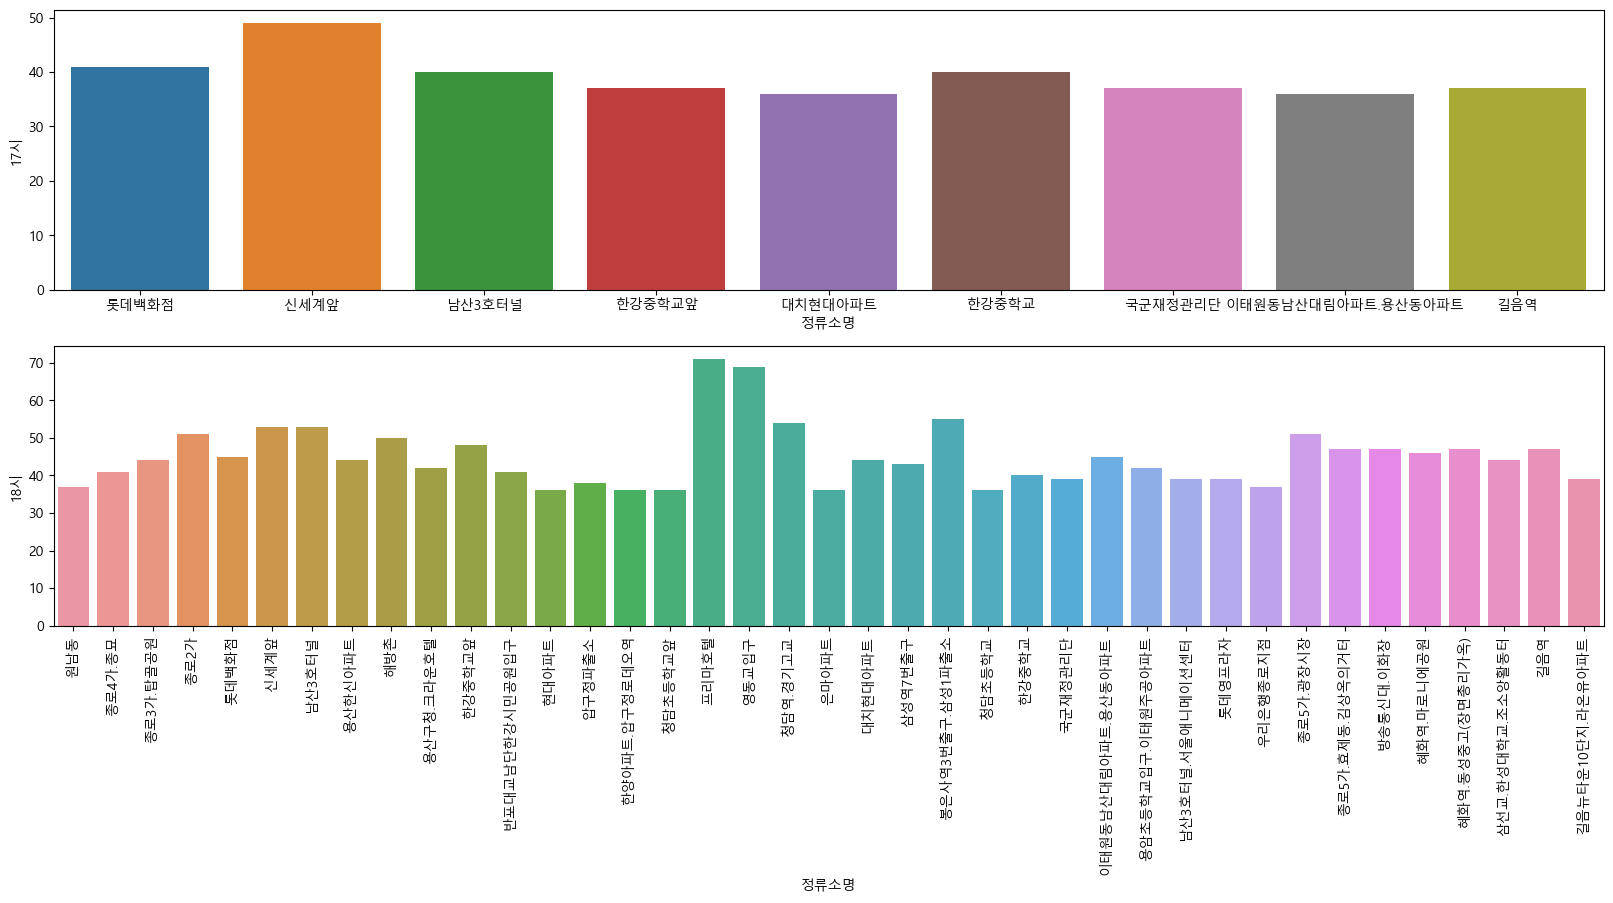

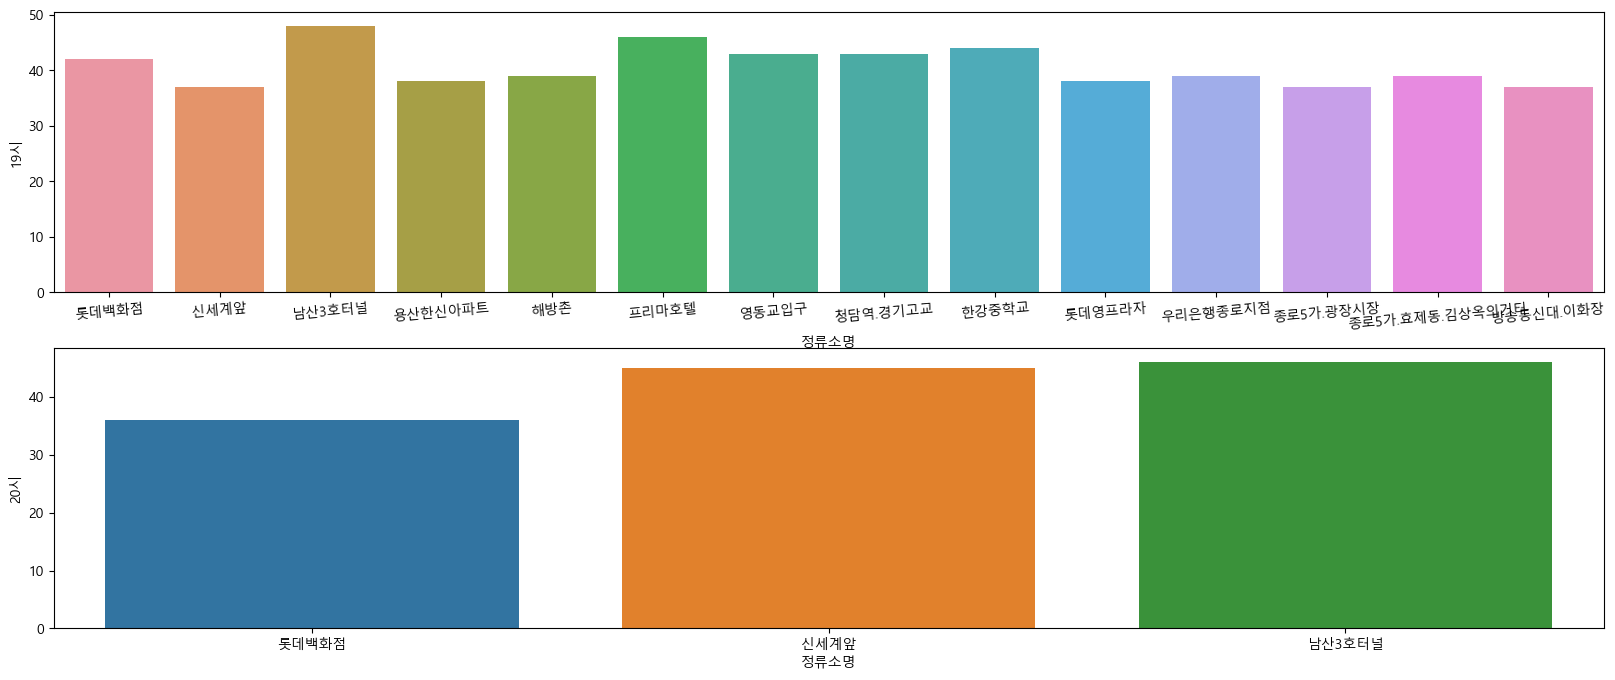

In [93]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='정류소명', y='17시', data=t_143[cond1])


plt.subplot(2, 1, 2)
sns.barplot(x='정류소명', y='18시', data=t_143[cond2])
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='정류소명', y='19시', data=t_143[cond3])
plt.xticks(rotation=5)

plt.subplot(2, 1, 2)
sns.barplot(x='정류소명', y='20시', data=t_143[cond4])

plt.show()

In [96]:
# 17시 혼잡도
b_143_17 = pd.merge(t_143[cond1], bus_143, on='정류소명', how='inner')
# 18시 혼잡도
b_143_18 = pd.merge(t_143[cond2], bus_143, on='정류소명', how='inner')
# 19시 혼잡도
b_143_19 = pd.merge(t_143[cond3], bus_143, on='정류소명', how='inner')
# 20시 혼잡도
b_143_20 = pd.merge(t_143[cond4], bus_143, on='정류소명', how='inner')


In [35]:
b_143.to_csv('./버스들/b_143.csv', index=False)
b_130.to_csv('./버스들/b_130.csv', index=False)
b_140.to_csv('./버스들/b_140.csv', index=False)
b_150.to_csv('./버스들/b_150.csv', index=False)
b_160.to_csv('./버스들/b_160.csv', index=False)
b_272.to_csv('./버스들/b_272.csv', index=False)
b_340.to_csv('./버스들/b_340.csv', index=False)
b_360.to_csv('./버스들/b_360.csv', index=False)
b_370.to_csv('./버스들/b_370.csv', index=False)
b_152.to_csv('./버스들/b_152.csv', index=False)


In [102]:
# 각각의 파일 저장
b_143_17.to_csv('./143번버스_17시.csv', index=False)
b_143_18.to_csv('./143번버스_18시.csv', index=False)
b_143_19.to_csv('./143번버스_19시.csv', index=False)
b_143_20.to_csv('./143번버스_20시.csv', index=False)

#### 하차인원이 어디로 향할까?

In [31]:
import pandas as pd
b_143_17 = pd.read_csv('./143번버스_17시.csv')

In [32]:
b_143_17.head(5)

,index,정류장순번,정류소명,17시,18시,19시,20시,17시_혼잡도,18시_혼잡도,19시_혼잡도,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수,year,month,longitude,latitude
0,19,20,롯데백화점,41,45,42,36,혼잡,혼잡,혼잡,...,1787,3233,1238,중구,12405,9383,2022,12,126.982065,37.564492
1,20,21,신세계앞,49,53,37,45,혼잡,매우혼잡,혼잡,...,948,1674,583,중구,7632,4005,2022,12,126.981526,37.560849
2,21,22,남산3호터널,40,53,48,46,혼잡,매우혼잡,혼잡,...,718,383,568,중구,2186,2808,2022,12,126.982670,37.558456
3,25,26,한강중학교앞,37,48,29,28,혼잡,혼잡,보통,...,554,210,509,용산구,2176,2261,2022,12,126.992429,37.524503
4,61,62,대치현대아파트,36,44,26,7,혼잡,혼잡,보통,...,373,736,248,강남구,3992,2156,2022,12,127.059917,37.501056


In [33]:
b_143_17['승하차인원수'] = b_143_17['17시'].diff()

In [5]:
# diff()값 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'Malgun Gothic'

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False # 마이너스 기호 깨짐 방지
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

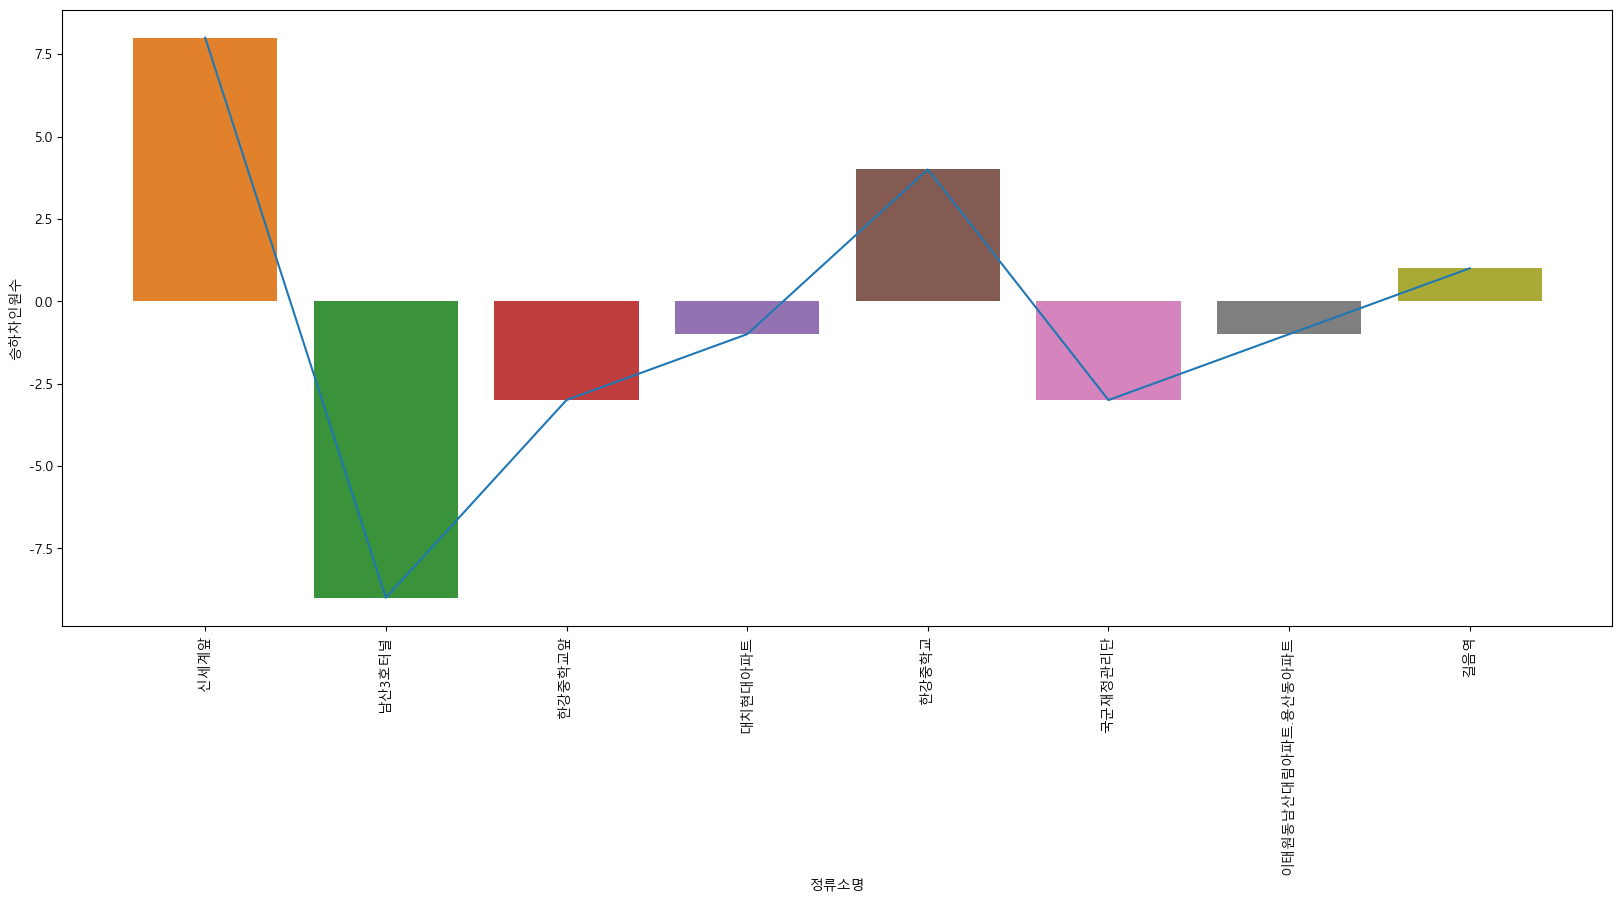

In [6]:
plt.figure(figsize=(20, 8))
sns.barplot(x='정류소명', y='승하차인원수', data=b_143_17)
sns.lineplot(x='정류소명', y='승하차인원수', data=b_143_17)
plt.xticks(rotation=90)
plt.show()

In [7]:
move = pd.read_csv('./생활이동_행정동_2022.12_17시.csv', encoding='cp949')

In [8]:
move.head(2)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202212,일,17,1101053,1101053,F,0,EE,40,84.26
1,202212,일,17,1101053,1101053,F,10,EH,2,5.93


In [9]:
move['출발 행정동 코드'] = move['출발 행정동 코드'].astype('str')
move['도착 행정동 코드'] = move['도착 행정동 코드'].astype('str')

In [10]:
move['s_si'] = move['출발 행정동 코드'].str.slice(0, 2)
move['s_g'] = move['출발 행정동 코드'].str.slice(0, 5)

move['d_si'] = move['도착 행정동 코드'].str.slice(0, 2)
move['d_g'] = move['도착 행정동 코드'].str.slice(0, 5)

In [11]:
# 서울시데이터만 추출
cond = ((move['s_si'] == '11') & (move['d_si']=='11'))
move[cond].head(2)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_si,s_g,d_si,d_g
0,202212,일,17,1101053,1101053,F,0,EE,40,84.26,11,11010,11,11010
1,202212,일,17,1101053,1101053,F,10,EH,2,5.93,11,11010,11,11010


In [12]:
move = move[cond]

In [13]:
move['s_g'] = move['s_g'].map({
    '11010' : '종로구',
    '11020' : '중구',
    '11030' : '용산구',
    '11040' : '성동구',
    '11050' : '광진구',
    '11060' : '동대문구',
    '11070' : '중랑구',
    '11080' : '성북구',
    '11090' : '강북구',
    '11100' : '도봉구',
    '11110' : '노원구',
    '11120' : '은평구',
    '11130' : '서대문구',
    '11140' : '마포구',
    '11150' : '양천구'
})

move['d_g'] = move['d_g'].map({
    '11010' : '종로구',
    '11020' : '중구',
    '11030' : '용산구',
    '11040' : '성동구',
    '11050' : '광진구',
    '11060' : '동대문구',
    '11070' : '중랑구',
    '11080' : '성북구',
    '11090' : '강북구',
    '11100' : '도봉구',
    '11110' : '노원구',
    '11120' : '은평구',
    '11130' : '서대문구',
    '11140' : '마포구',
    '11150' : '양천구'
})

In [14]:
move.head(5)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_si,s_g,d_si,d_g
0,202212,일,17,1101053,1101053,F,0,EE,40,84.26,11,종로구,11,종로구
1,202212,일,17,1101053,1101053,F,10,EH,2,5.93,11,종로구,11,종로구
2,202212,일,17,1101053,1101053,F,10,EE,41,17.93,11,종로구,11,종로구
3,202212,일,17,1101053,1101053,F,10,HE,8,11.86,11,종로구,11,종로구
4,202212,일,17,1101053,1101053,F,15,EE,13,20.33,11,종로구,11,종로구


In [15]:
move.shape

(6025413, 14)

In [16]:
move = move.dropna(axis=0)

In [17]:
move.shape

(2560497, 14)

In [18]:
# 출발행정동코드와 도착행정동코드를 통해 동까지 매핑
dong = pd.read_csv('./서울생활이동데이터_행정동코드_20210907.csv', sep=',', encoding='cp949')

In [19]:
drop_cols = ['시도', '시군구', 'full_name']
dong.drop(drop_cols, axis=1, inplace=True)
dong.head(2)

,읍면동,name
0,1101053,사직동
1,1101054,삼청동


In [20]:
move['d_temp'] = move['도착 행정동 코드']
move.head(2)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_si,s_g,d_si,d_g,d_temp
0,202212,일,17,1101053,1101053,F,0,EE,40,84.26,11,종로구,11,종로구,1101053
1,202212,일,17,1101053,1101053,F,10,EH,2,5.93,11,종로구,11,종로구,1101053


In [21]:
dong.rename(columns={
    '읍면동': '출발 행정동 코드',
    'name': 's_d'
}, inplace=True)

In [22]:
dong['출발 행정동 코드'] = dong['출발 행정동 코드'].astype('str')

In [23]:
temp1 = pd.merge(move, dong, on='출발 행정동 코드', how='inner')

In [24]:
dong.rename(columns={
    '출발 행정동 코드' : '도착 행정동 코드',
    'name': 'd_d'
}, inplace=True)

In [25]:
temp2 = pd.merge(temp1, dong, on='도착 행정동 코드', how='inner')

In [26]:
temp2.head(2)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_si,s_g,d_si,d_g,d_temp,s_d_x,s_d_y
0,202212,일,17,1101053,1101053,F,0,EE,40,84.26,11,종로구,11,종로구,1101053,사직동,사직동
1,202212,일,17,1101053,1101053,F,10,EH,2,5.93,11,종로구,11,종로구,1101053,사직동,사직동


In [27]:
cols = [
    '출발 행정동 코드', '도착 행정동 코드', 's_si', 'd_si', 'd_temp'
]
temp2.drop(cols, axis=1, inplace=True)

In [28]:
temp2.head(2)

,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_g,d_g,s_d_x,s_d_y
0,202212,일,17,F,0,EE,40,84.26,종로구,종로구,사직동,사직동
1,202212,일,17,F,10,EH,2,5.93,종로구,종로구,사직동,사직동


In [29]:
temp2.rename(columns={
    's_d_x' : 's_d',
    's_d_y' : 'd_d'
}, inplace=True)

In [30]:
temp2.head(2)

,대상연월,요일,도착시간,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),s_g,d_g,s_d,d_d
0,202212,일,17,F,0,EE,40,84.26,종로구,종로구,사직동,사직동
1,202212,일,17,F,10,EH,2,5.93,종로구,종로구,사직동,사직동


In [35]:
b_143_17 = b_143_17.fillna(0)

In [36]:
b_143_17.head(2)

,index,정류장순번,정류소명,17시,18시,19시,20시,17시_혼잡도,18시_혼잡도,19시_혼잡도,...,20시승차총승객수,20시하차총승객수,자치구,퇴근시간대승차총승객수,퇴근시간대하차총승객수,year,month,longitude,latitude,승하차인원수
0,19,20,롯데백화점,41,45,42,36,혼잡,혼잡,혼잡,...,3233,1238,중구,12405,9383,2022,12,126.982065,37.564492,0.0
1,20,21,신세계앞,49,53,37,45,혼잡,매우혼잡,혼잡,...,1674,583,중구,7632,4005,2022,12,126.981526,37.560849,8.0


- 퇴근시간 맞춤버스(or 순환버스)의 목적을 고려하여 집으로 향하는 -  - - 이동인구만 추출
- WH(회사/학교->집), EH(기타->집), HH(집->집)

In [40]:
temp2 = temp2.loc[temp2['이동유형'].isin(['WH', 'EH', 'HH'])]
temp2.shape

(1081635, 12)

In [ ]:
!pip install geopandas

In [51]:
import geopandas as gpd
geo_master = gpd.read_file('./test.shp')

In [52]:
geo_master.head(2)

,si,gu,dong,geometry
0,서울시,종로구,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,서울시,종로구,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."


In [48]:
# distance를 구하는 함수
rows = []
for _, gu1, dong1, geo1 in geo_master.values:
    for _, gu2, dong2, geo2 in geo_master.values:
        rows.append((
            gu1, dong1, gu2, dong2, geo1.distance(geo2)
        ))
emd_dists = pd.DataFrame(rows, columns=['gu1', 'dong1', 'gu2', 'dong2', 'distance'])
emd_dists.head()

,gu1,dong1,gu2,dong2,distance
0,종로구,청운동,종로구,청운동,0.000000
1,종로구,청운동,종로구,신교동,0.000000
2,종로구,청운동,종로구,궁정동,0.000000
3,종로구,청운동,종로구,효자동,40.558871
4,종로구,청운동,종로구,창성동,301.530492


In [50]:
# distance 구한 csv파일 저장.
emd_dists.to_csv('./143_17시/distance_city', index=False)
# 이동 유형을 분리한 temp2파일 저장
temp2.to_csv('./143_17시/이동유형.csv', index=False)